## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math

THE MNIST DATASET WAS DOWNLOADED FROM KAGGLE 

In [26]:
data = pd.read_csv('train.csv') #MNIST DATASET from kaggle
data.head(n=10)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data.shape #we have 42000 images and 785 columns

(42000, 785)

In [29]:
data = np.array(data)
#np.random.shuffle(data) #shuffling the data
m, n = data.shape
m,n

(42000, 785)

In [30]:
x = data[:, 1:].T/255.0  # extracting the pixel value 
y = data[:, 0]   # extracting the labels in the first column
print(x.shape)
print(y.shape)

(784, 42000)
(42000,)


## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


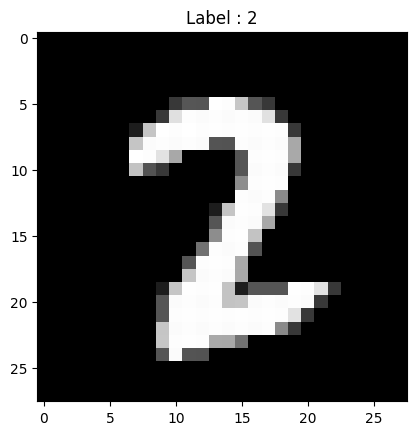

In [31]:
def image(a):
    a = np.random.randint(0, m)
    plt.imshow(x[:, a].reshape(28, 28), cmap='gray')
    plt.title("Label : {}".format(y[a]))
    plt.show()
#random image along with its label
img = image(0)


In [33]:
#one hot encoding
def one_hot(y):
    one_hot_y = np.zeros((10, y.size))
    for i in range(y.size):
        one_hot_y[y[i], i] = 1
    return one_hot_y
one_hot_y = one_hot(y)
one_hot_y.shape

(10, 42000)

In [35]:
#def parameters() :

class Parameters:
    def __init__(self):
        self.W1 = np.random.randn(10, 784)# -0.5 #0.01  # adding bias to the weights
        self.W2 = np.random.randn(10,10) #- 0.5#0.01
        self.b1 = np.zeros((10,m)) #- 0.5
        self.b2 = np.zeros((10, m)) #- 0.5  
        self.alpha  = 0.1    # learning rate
params = Parameters()
W1 = params.W1
W2 = params.W2
b1 = params.b1
b2 = params.b2
alpha = params.alpha
        

print(W1.shape, W2.shape, b1.shape, b2.shape)
x.shape, one_hot_y.shape

W1

(10, 784) (10, 10) (10, 42000) (10, 42000)


array([[ 0.05708284, -0.59462814, -1.57642877, ...,  0.29604152,
        -0.7819709 , -1.38779004],
       [ 1.5114108 , -0.26091474,  0.26593479, ...,  0.94381345,
         0.93787259,  1.0826141 ],
       [ 0.51151976, -0.30556   , -0.10081233, ...,  1.73723413,
        -0.04763377,  0.3823901 ],
       ...,
       [-0.57750233, -0.67920345, -1.87254368, ..., -1.50501424,
        -2.32830102, -0.25003041],
       [ 0.14848178, -1.96446296, -0.58214486, ..., -1.55154963,
        -0.14628594,  0.3051012 ],
       [-0.21771693, -1.48945434, -0.95309355, ...,  0.15849681,
        -0.36205119, -1.30861657]])

In [36]:
#ACTIVATION FUNCTIONS 
 
def RELU(L):
    return np.maximum(0, L)#+ 1e-8  #rectified linear unit

#def softmax(x):
    #x= x -np.max(x)
     # Debugging: Check if softmax output is a valid probability distribution
   # print("Softmax output:\n", softmax_output)
   # print("Sum of probabilities:", np.sum(softmax_output))  # Should be close to 1
    
    #return np.exp(x) / np.sum(np.exp(x), axis=0 , keepdims=True) #softmax function

 

In [37]:
def softmax(x):
    x = x - np.max(x)  # Numerical stability
    softmax_output = np.exp(x) / np.sum(np.exp(x), axis=0, keepdims=True)
    
    # Debugging: Check if softmax output is a valid probability distribution
   # print("Softmax output:\n", softmax_output)
   # print("Sum of probabilities:", np.sum(softmax_output))  # Should be close to 1
    
    return softmax_output
#softmax(np.array([1,2,3,4,5]))


In [38]:
def for_pass(W1, W2, b1, b2, x):
    L1 = np.dot(W1, x) + b1 #first layer
    A1 = RELU(L1) #activation function
    L2 = np.dot(W2, A1) + b2 #second layer
    A2 = softmax(L2) #activation function
    return L1, A1, L2, A2



L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)


In [39]:
def der_Relu(x):
    x[x<=0] = 0
    x[x>0] /= 1
    return x

In [40]:
def back_pass(L2, A2, one_hot_y, W2, A1, x, L1):
     #error in the second layer
    dL2 = A2 - one_hot_y  # error in the second layer
    dW2 = np.dot(dL2, A1.T)/m #gradient of the weights in the second layer
    db2 = np.sum(dL2, axis=1, keepdims=True)/m #gradient of the bias in the second layer
    dL1 = np.dot(W2.T, dL2) * der_Relu(L1) #error in the first layer
    dW1 = np.dot(dL1, x.T)/m #gradient of the weights in the first layer
    db1 = np.sum(dL1, axis=1, keepdims=True)/m #gradient of the bias in the first layer
    return dL2, dW2, db2, dL1, dW1, db1
  

In [41]:
def weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha) :
    #alpha = 0.01
    W1 = W1 - alpha*dW1    #aplha is the learning rate
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, W2, b1, b2

In [42]:
def get_predictions(A2) :
    return np.argmax(A2, 0) #returns the index of the maximum value in the array

In [43]:
def get_accuracy(predictions, y):
    return (np.sum(predictions == y) / y.size ) * 100 # returns the accuracy of the model


In [44]:
def compute_loss(A2, one_hot_y):
    m = one_hot_y.shape[1]  # Number of examples
    # Cross-entropy loss
    loss = -np.sum(one_hot_y * np.log(A2 + 1e-8)) / m  # Adding epsilon to avoid log(0)
    return loss

In [122]:
def gradient_descent(x, one_hot_y, alpha, iterations):
    #W1, W2, b1, b2 = parameters()
    W1 = params.W1
    W2 = params.W2
    b1 = params.b1
    b2 = params.b2
    for i in range(iterations):
        #forward pass
        L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
        
       
        #backward pass 
        dL2, dW2, db2, dL1, dW1, db1 = back_pass(L2, A2, one_hot_y, W2, A1, x, L1)
        #weight update
        W1, W2, b1, b2 = weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        # calculating accuracy
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, y)
        loss = compute_loss(A2, one_hot_y)
        if i % 100 == 0:
           print(f"accuracy is {accuracy}")
           print(f"loss is {loss}")
    print(f"Final accuracy is {accuracy}")
    return W1, W2, b1, b2, A2
            
W1, W2, b1, b2, A2 = gradient_descent(x, one_hot_y, 0.2, 2000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
#print(f"Final accuracy is {accuracy}")


 

accuracy is 17.05952380952381
loss is 13.27642643676766
accuracy is 20.257142857142856
loss is 2.1281794409557757
accuracy is 25.10952380952381
loss is 2.00230900436946
accuracy is 29.13809523809524
loss is 1.8985354969474564
accuracy is 31.05952380952381
loss is 1.8358730046875718
accuracy is 32.63095238095238
loss is 1.7906023434234597
accuracy is 36.7952380952381
loss is 1.7082816834164125
accuracy is 41.319047619047616
loss is 1.565325422927654
accuracy is 42.43571428571429
loss is 1.5120716437614496
accuracy is 43.471428571428575
loss is 1.473662549464279
accuracy is 44.23809523809524
loss is 1.4435782987636443
accuracy is 44.892857142857146
loss is 1.4177804159001393
accuracy is 45.44761904761905
loss is 1.3954322931550411
accuracy is 46.00476190476191
loss is 1.3765715961142215
accuracy is 46.53333333333333
loss is 1.3601810517327915
accuracy is 46.983333333333334
loss is 1.3463020416878861
accuracy is 47.304761904761904
loss is 1.3351207924405426
accuracy is 47.57857142857143
l

accuracy is 17.05952380952381
loss is 13.27642643676766
accuracy is 25.10952380952381
loss is 2.00230900436946
accuracy is 31.05952380952381
loss is 1.8358730046875718
accuracy is 36.7952380952381
loss is 1.7082816834164125
accuracy is 42.43571428571429
loss is 1.5120716437614496
accuracy is 44.23809523809524
loss is 1.4435782987636443
accuracy is 45.44761904761905
loss is 1.3954322931550411
accuracy is 46.53333333333333
loss is 1.3601810517327915
accuracy is 47.304761904761904
loss is 1.3351207924405426
accuracy is 47.85476190476191
loss is 1.3167696487340201
accuracy is 48.33571428571429
loss is 1.3008942099405922
accuracy is 48.70238095238095
loss is 1.288016736853984
accuracy is 49.02142857142857
loss is 1.2778281826180327
accuracy is 49.28571428571429
loss is 1.2699275583581895
accuracy is 49.423809523809524
loss is 1.2637179209712324
accuracy is 49.54047619047619
loss is 1.258365076970093
accuracy is 49.65
loss is 1.253572104727942
accuracy is 49.7
loss is 1.2492501022024067
accu

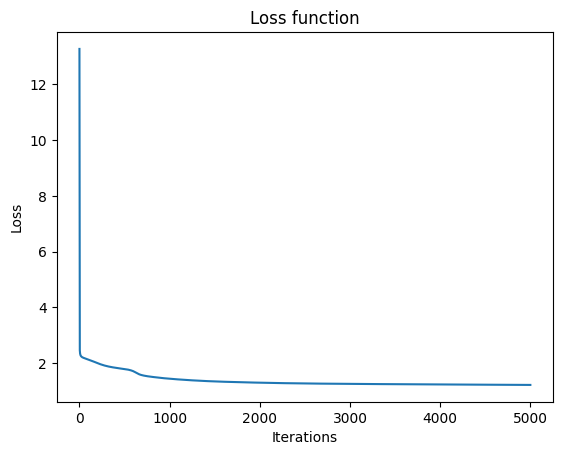

In [126]:
def gradient_descent(x, one_hot_y, alpha, iterations):
    #W1, W2, b1, b2 = parameters()
    W1 = params.W1
    W2 = params.W2
    b1 = params.b1
    b2 = params.b2
    losses = []  # Initialize an empty list to store loss values
    for i in range(iterations):
        #forward pass
        L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
        
        #backward pass 
        dL2, dW2, db2, dL1, dW1, db1 = back_pass(L2, A2, one_hot_y, W2, A1, x, L1)
        #weight update
        W1, W2, b1, b2 = weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        # calculating accuracy
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, y)
        loss = compute_loss(A2, one_hot_y)
        losses.append(loss)  # Store the loss value
        if i % 200 == 0:
           print(f"accuracy is {accuracy}")
           print(f"loss is {loss}")
    print(f"Final accuracy is {accuracy}")
    return W1, W2, b1, b2, A2, losses
            
W1, W2, b1, b2, A2, losses = gradient_descent(x, one_hot_y, 0.2, 5000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
#print(f"Final accuracy is {accuracy}")

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()

 

In [ ]:
import cupy as cp

pip install cupy
# Convert numpy arrays to cupy arrays
x_cp = cp.array(x)
y_cp = cp.array(y)
one_hot_y_cp = cp.array(one_hot_y)
W1_cp = cp.array(W1)
W2_cp = cp.array(W2)
b1_cp = cp.array(b1)
b2_cp = cp.array(b2)

# Update functions to use cupy arrays
def for_pass_cp(W1, W2, b1, b2, x):
    L1 = cp.dot(W1, x) + b1
    A1 = cp.maximum(0, L1)  # RELU
    L2 = cp.dot(W2, A1) + b2
    A2 = cp.exp(L2 - cp.max(L2, axis=0, keepdims=True)) / cp.sum(cp.exp(L2 - cp.max(L2, axis=0, keepdims=True)), axis=0, keepdims=True)  # softmax
    return L1, A1, L2, A2

def back_pass_cp(L2, A2, one_hot_y, W2, A1, x, L1):
    dL2 = A2 - one_hot_y
    dW2 = cp.dot(dL2, A1.T) / m
    db2 = cp.sum(dL2, axis=1, keepdims=True) / m
    dL1 = cp.dot(W2.T, dL2) * (L1 > 0)
    dW1 = cp.dot(dL1, x.T) / m
    db1 = cp.sum(dL1, axis=1, keepdims=True) / m
    return dL2, dW2, db2, dL1, dW1, db1

def weight_update_cp(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha):
    W1 -= alpha * dW1
    W2 -= alpha * dW2
    b1 -= alpha * db1
    b2 -= alpha * db2
    return W1, W2, b1, b2

def gradient_descent_cp(x, one_hot_y, alpha, iterations):
    W1 = cp.array(params.W1)
    W2 = cp.array(params.W2)
    b1 = cp.array(params.b1)
    b2 = cp.array(params.b2)
    losses = []
    for i in range(iterations):
        L1, A1, L2, A2 = for_pass_cp(W1, W2, b1, b2, x)
        dL2, dW2, db2, dL1, dW1, db1 = back_pass_cp(L2, A2, one_hot_y, W2, A1, x, L1)
        W1, W2, b1, b2 = weight_update_cp(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        loss = -cp.sum(one_hot_y * cp.log(A2 + 1e-8)) / m
        losses.append(cp.asnumpy(loss))
        if i % 200 == 0:
            predictions = cp.argmax(A2, axis=0)
            accuracy = cp.mean(predictions == y)
            print(f"Iteration {i}: Loss = {loss}, Accuracy = {accuracy * 100}%")
    return W1, W2, b1, b2, A2, losses

# Run gradient descent with cupy
W1_cp, W2_cp, b1_cp, b2_cp, A2_cp, losses_cp = gradient_descent_cp(x_cp, one_hot_y_cp, t, 7000)

# Convert results back to numpy arrays
W1 = cp.asnumpy(W1_cp)
W2 = cp.asnumpy(W2_cp)
b1 = cp.asnumpy(b1_cp)
b2 = cp.asnumpy(b2_cp)
A2 = cp.asnumpy(A2_cp)

     ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
     ---------------------------------------- 3.4/3.4 MB 46.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'done'
         ---------------------------------------- 0.0/989.5 kB ? eta -:--:--
         --------------------------------------- 989.5/989.5 kB 12.3 MB/s eta 0:00:00
        error: subprocess-exited-with-error
      
        Ã— Building wheel for fastrlock (pyproject.toml) did not run successfully.
        â”‚ exit code: 1
        â•°â”€> [14 lines of output]
            building without Cython
            C:\Users\prana\AppData\Local\Temp\pip-build-env-rarq39p2\overlay\

accuracy is 11.754761904761905
loss is 14.187827557769982
accuracy is 15.44047619047619
loss is 2.253718327170855
accuracy is 20.65
loss is 2.131973762153419
accuracy is 25.076190476190476
loss is 1.985342371296406
accuracy is 29.72142857142857
loss is 1.8371528260435845
accuracy is 32.319047619047616
loss is 1.7341223453451464
accuracy is 33.63333333333333
loss is 1.6711102303949779
accuracy is 34.39761904761905
loss is 1.627498164645864
accuracy is 35.016666666666666
loss is 1.5960824364175545
accuracy is 35.49523809523809
loss is 1.5727912284417263
accuracy is 35.90238095238095
loss is 1.5547991100332619
accuracy is 36.28333333333333
loss is 1.5397105162156006
accuracy is 36.602380952380955
loss is 1.5264159610151147
accuracy is 37.00476190476191
loss is 1.5137126226177167
accuracy is 37.38095238095238
loss is 1.5015533813376982
accuracy is 37.77619047619047
loss is 1.4904776202488172
accuracy is 38.24285714285715
loss is 1.480142463462332
accuracy is 38.57380952380952
loss is 1.470

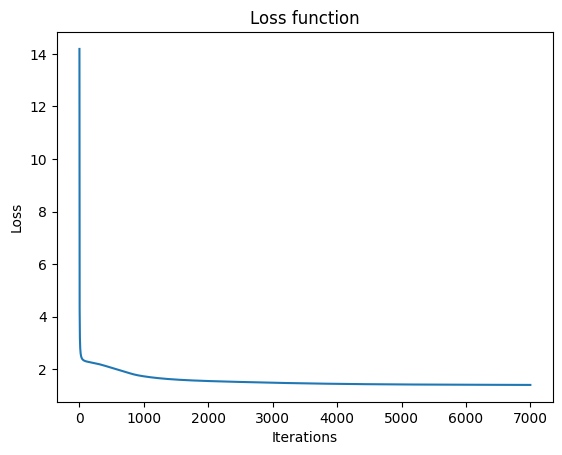

In [ ]:
def gradient_descent(x, one_hot_y, alpha, iterations):
    #W1, W2, b1, b2 = parameters()
    W1 = params.W1
    W2 = params.W2
    b1 = params.b1
    b2 = params.b2
    losses = []  # Initialize an empty list to store loss values
    for i in range(iterations):
        #forward pass
        L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
        
        #backward pass 
        dL2, dW2, db2, dL1, dW1, db1 = back_pass(L2, A2, one_hot_y, W2, A1, x, L1)
        #weight update
        W1, W2, b1, b2 = weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        # calculating accuracy
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, y)
        loss = compute_loss(A2, one_hot_y)
        losses.append(loss)  # Store the loss value
        if i % 200 == 0:
           print(f"accuracy is {accuracy}")
           print(f"loss is {loss}")
    print(f"Final accuracy is {accuracy}")
    return W1, W2, b1, b2, A2, losses
            
t = 3 * math.e**(-4)           
W1, W2, b1, b2, A2, losses = gradient_descent(x, one_hot_y, t, 7000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
#print(f"Final accuracy is {accuracy}")

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()

 

accuracy is 11.754761904761905
loss is 14.187827557769982
accuracy is 14.183333333333334
loss is 2.2616838699787714
accuracy is 17.604761904761904
loss is 2.1648364896581396
accuracy is 18.307142857142857
loss is 2.1360004497823084
accuracy is 20.25
loss is 2.1005770372285544
accuracy is 26.1
loss is 1.8500025085218306
accuracy is 28.942857142857143
loss is 1.7810862772481242
accuracy is 35.49523809523809
loss is 1.6700827712680808
accuracy is 38.95
loss is 1.5717777689377572
accuracy is 40.57857142857143
loss is 1.5179567676592869
accuracy is 41.195238095238096
loss is 1.4978074169843696
accuracy is 41.595238095238095
loss is 1.48754453968566
accuracy is 41.819047619047616
loss is 1.4807819483395366
accuracy is 41.93333333333334
loss is 1.4753003466751298
accuracy is 42.07142857142857
loss is 1.4706772896839018
Final accuracy is 42.238095238095234


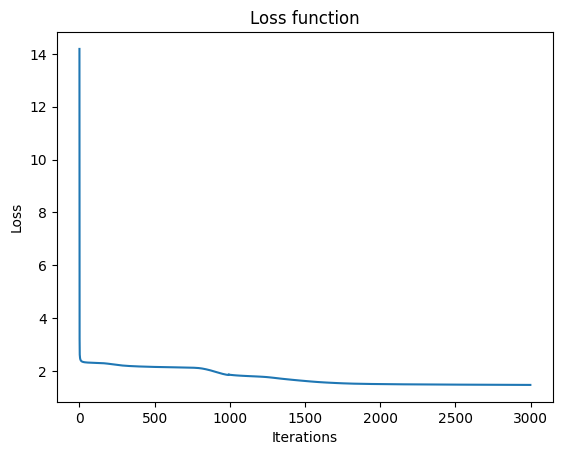

In [64]:
W1, W2, b1, b2, A2, losses = gradient_descent(x, one_hot_y, 0.23, 3000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
#print(f"Final accuracy is {accuracy}")

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()
